## Todo MVP1 (minimal viable product)

- [x] write a few-lines class 
- [x] test you can populate the class
- [x] write game_to_id() custom fen string
- [x] test transcribe all opening positions of a game into a dict
- [x] write check if a position is already in the dict
- [x] test populate dict with multiplicities
- [x] write white advantage

- [x] take a BREAK
- [] take notes of what I learned about programming in Python

- [x] write moves
- [x] test find best move
- [] write pap[1] advantage that you gain if you study one move
- [] mvp1 display the best move to study at level 1 from any position

## Resources

python-chess documentation  
https://python-chess.readthedocs.io/en/latest/pgn.html

Python classes  
https://www.w3schools.com/python/python_classes.asp

Python dictionary  
https://realpython.com/python-dicts/

Python iterables and next() function
https://linuxhint.com/python-next-function/#:~:text=The%20Next%20Function%20in%20Python%20is%20used%20to,just%20as%20critical%20as%20any%20other%20Python%20function.

## Test Python is working

In [1]:
2+2

4

In [2]:
import chess
import chess.pgn
import re

## Small database of games

In [3]:
def open_test_pgn():
    return open("./pgn/C25.pgn")

In [4]:
pgn = open_test_pgn()

## My class to parse the database

What do I need in my class to store chess position data

- string name id of the position. I will use a custom FEN Forsyth-Edwards Notation. I will not use the halfmove clock and the fullmove number to distinguish different positions. Though, I can put this as a **#todo custom option** later on.
- multiplicity. How many times the position has been found in the database
- min ply. Each chess move consists of a white ply and of a black ply. Min ply will be the minimal ply at which the given position has been found. The start empty board is at ply 0, after white plays it is now a board in ply 1 and so on
- result. It will be a triple [w,d,b], where w=multiplicity of white wins, d=number of draws, b=multiplicity of black wins
- wa stuff. 
    - wa = white_advantage, is calculated as (w-b)/m.
    - waw[n] is white advantage if white is willing to learn n tree plies ahead
    - wab[n] is white advantage if black is willing to learn n tree plies ahead 
    - pap[n] is player advantage if the player plays and is willing to learn n tree plies ahead
    - oas[n] is opponent advantage if the opponent is willing to study the moves of the player n tree plies ahead
- moves[]. The list of moves that I will follow

I will later have some extra data, such as
- engine
- evaluation
- human opening name?
- best move
- reasonable moves
- other moves

or other things. 

In [57]:

def my_fen_id(fen_string):
    return re.sub('[0-9]+ [0-9]+$','FEN_id ',fen_string)

def gamenode_to_id(chessgamenode):
    return my_fen_id(chessgamenode.board().fen())

class MyGame:
    def __init__(self,chessgamenode):
        scacchiera = chessgamenode.board()
        fen = scacchiera.fen()
        
        self.board = chessgamenode.board()
        self.id = gamenode_to_id(chessgamenode)
        
        self.moves_available = []
        self.variations_available = {}
        
        self.multiplicity = 0
        self.white_wins = 0
        self.draws = 0
        self.black_wins = 0
        self.white_advantage = 0
        
        self.update(chessgamenode)
        
        
    def update(self,chessgamenode):
        self.multiplicity += 1
        
        game_result = chessgamenode.game().headers['Result']
        # with Python 3.10 you would have the syntax match...case...
        if game_result == '1-0':
            self.white_wins += 1
        if game_result == '1/2-1/2':
            self.draws += 1
        if game_result == '0-1':
            self.black_wins += 1
                
        self.white_advantage = float(self.white_wins - self.black_wins) / float(self.multiplicity) 
        
        next_move = next(iter(chessgamenode.mainline_moves()), None)
        if next_move != None:
            if next_move not in self.moves_available:
                self.moves_available.append(next_move)
                new_variation = chessgamenode.next()
                # Btw, avrei potuto evitare di iterare su mainline moves
                # semplicemente calcolando prima chessgamenode.next()
                # e poi, se non None, chiamare .move
                new_variation_id = gamenode_to_id (new_variation)
                self.variations_available[next_move] = new_variation_id
            

## Tests


In [58]:
test_game = chess.pgn.read_game(pgn)

In [59]:
test_class = MyGame(test_game)

In [66]:
print(test_class.id)
print(test_class.board)
print(test_class.multiplicity)
test_class.update(test_game)
display(test_class.moves_available)
display(test_class.variations_available)

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - FEN_id 
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
3


[Move.from_uci('e2e4')]

{Move.from_uci('e2e4'): 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - FEN_id '}

In [67]:
re.sub('[0-9]+ [0-9]+$','FEN_id ',test_class.board.fen())

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - FEN_id '

In [68]:
b= test_game.board()

In [69]:
f= b.fen()

In [70]:
b.board_fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR'

In [71]:
b.turn

True

In [72]:
b.fullmove_number

1

In [73]:
b.halfmove_clock

0

In [74]:
b.halfmove_clock=5

In [75]:
b.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 5 1'

In [76]:
f

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

Pyhton regex replace
https://appdividend.com/2022/01/27/python-regex-replace/#:~:text=1%20Python%20regex%20replace.%20To%20replace%20a%20string,Python%20using%20regular%20expressions.%20...%208%20See%20also
import re
re.sub

regex number /[0-100]/ will suffice for me
regex endline /$/


In [77]:
import re
print(re.sub('[0-9]+ [0-9]+$','FEN_id ',f))

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - FEN_id 


### Test transcribing into a dictionary the first few moves



In [78]:
def parse_game(dizionario,new_game):

    new_position = new_game

    for move in new_game.mainline_moves():  
        
        new_position = new_position.variation(move)
        
        new_id = gamenode_to_id(new_position)

        if new_id in dizionario.keys():
            dizionario[new_id].update(new_position)
        else:
            dizionario[new_id] = MyGame(new_position)

        if new_position.ply() == 4:
            break
            
            #rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - FEN_id
            #rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - FEN_id 

In [79]:
dizionario = {}
pgn = open_test_pgn()

#8 sec for 1000 games depth 4
for i in range(1000):
    game = chess.pgn.read_game(pgn)
    parse_game(dizionario,game)

In [80]:
dizionario.keys()

dict_keys(['rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - FEN_id ', 'rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - FEN_id ', 'rnbqkbnr/pppp1ppp/8/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR b KQkq - FEN_id ', 'r1bqkbnr/pppp1ppp/2n5/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ', 'rnbqk1nr/pppp1ppp/8/2b1p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ', 'rnbqkbnr/pp1p1ppp/2p5/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ', 'rnbqk1nr/pppp1ppp/8/4p3/1b2P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ', 'r1bqkbnr/pppppppp/2n5/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - FEN_id ', 'r1bqkbnr/pppppppp/2n5/8/4P3/2N5/PPPP1PPP/R1BQKBNR b KQkq - FEN_id ', 'rnbqkbnr/pppp1p1p/6p1/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ', 'rnbqkbnr/pppppppp/8/8/8/2N5/PPPPPPPP/R1BQKBNR b KQkq - FEN_id ', 'rnbqkbnr/pppp1ppp/8/4p3/8/2N5/PPPPPPPP/R1BQKBNR w KQkq - FEN_id ', 'rnbqk1nr/ppppbppp/8/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ', 'rnbqkbnr/ppp2ppp/3p4/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ', 'rnbqkbnr/pp

In [88]:
def calculate_advantages(position,dictionary):
    answer = {}
    
    for move, variation_id in position.variations_available.items():
        if variation_id not in dictionary.keys():
            continue
            
        variation_position  = dictionary[variation_id]
        
        variation_advantage = variation_position.white_advantage
        
        answer[move] = variation_advantage
    
    return answer
    
    
def find_best_move(dictionary_advantages):
    max_advantage = -2   # any number less than -1 would do
    best_move = None
    
    for move, variation_adv in dictionary_advantages.items():     
        if variation_adv > max_advantage:
            best_move = move
            max_advantage = variation_adv
    
    return {"move": best_move, "advantage": max_advantage}

This position has been found 990 times
and it has a white advantage equal to
0.1484848484848485
Its results are
[468-201-321]
:


{Move.from_uci('e7e5'): 'rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - FEN_id ',
 Move.from_uci('b8c6'): 'r1bqkbnr/pppppppp/2n5/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - FEN_id '}

[Move.from_uci('e7e5'), Move.from_uci('b8c6')]

{Move.from_uci('e7e5'): 0.14937759336099585,
 Move.from_uci('b8c6'): 0.11538461538461539}

Best move


Move.from_uci('e7e5')

with an advantage equal to 
0.14937759336099585
and a relative advantage equal to
0.00089274487614735
since  it has a white advantage equal to
0.1484848484848485
:


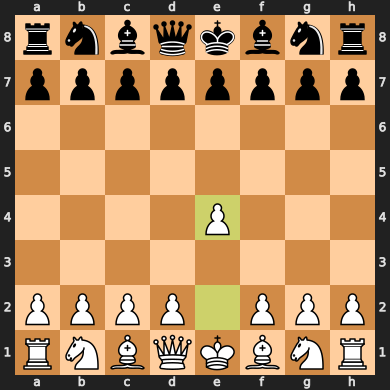

This position has been found 964 times
and it has a white advantage equal to
0.14937759336099585
Its results are
[456-196-312]
:


{Move.from_uci('b1c3'): 'rnbqkbnr/pppp1ppp/8/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('f1c4'): 'rnbqkbnr/pppp1ppp/8/4p3/2B1P3/8/PPPP1PPP/RNBQK1NR b KQkq - FEN_id ',
 Move.from_uci('f2f4'): 'rnbqkbnr/pppp1ppp/8/4p3/4PP2/8/PPPP2PP/RNBQKBNR b KQkq - FEN_id '}

[Move.from_uci('b1c3'), Move.from_uci('f1c4'), Move.from_uci('f2f4')]

{Move.from_uci('b1c3'): 0.14673913043478262,
 Move.from_uci('f1c4'): 0.32608695652173914,
 Move.from_uci('f2f4'): -0.4}

Best move


Move.from_uci('f1c4')

with an advantage equal to 
0.32608695652173914
and a relative advantage equal to
0.1767093631607433
since  it has a white advantage equal to
0.14937759336099585
:


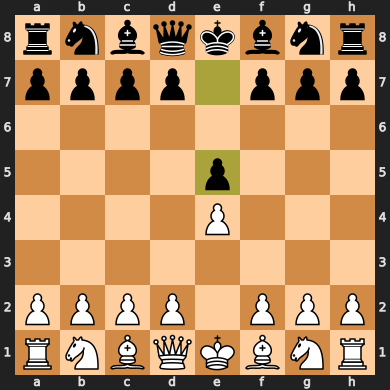

This position has been found 920 times
and it has a white advantage equal to
0.14673913043478262
Its results are
[438-179-303]
:


{Move.from_uci('b8c6'): 'r1bqkbnr/pppp1ppp/2n5/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('f8c5'): 'rnbqk1nr/pppp1ppp/8/2b1p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('c7c6'): 'rnbqkbnr/pp1p1ppp/2p5/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('f8b4'): 'rnbqk1nr/pppp1ppp/8/4p3/1b2P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('g7g6'): 'rnbqkbnr/pppp1p1p/6p1/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('f8e7'): 'rnbqk1nr/ppppbppp/8/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('d7d6'): 'rnbqkbnr/ppp2ppp/3p4/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('c7c5'): 'rnbqkbnr/pp1p1ppp/8/2p1p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('f7f5'): 'rnbqkbnr/pppp2pp/8/4pp2/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('a7a6'): 'rnbqkbnr/1ppp1ppp/p7/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR w KQkq - FEN_id ',
 Move.from_uci('b7b6'): 'rnbqkbnr/p1pp1ppp/1p6

[Move.from_uci('b8c6'),
 Move.from_uci('f8c5'),
 Move.from_uci('c7c6'),
 Move.from_uci('f8b4'),
 Move.from_uci('g7g6'),
 Move.from_uci('f8e7'),
 Move.from_uci('d7d6'),
 Move.from_uci('c7c5'),
 Move.from_uci('f7f5'),
 Move.from_uci('a7a6'),
 Move.from_uci('b7b6'),
 Move.from_uci('g8e7'),
 Move.from_uci('d7d5')]

{Move.from_uci('b8c6'): 0.1169811320754717,
 Move.from_uci('f8c5'): 0.12831858407079647,
 Move.from_uci('c7c6'): 0.5333333333333333,
 Move.from_uci('f8b4'): 0.3548387096774194,
 Move.from_uci('g7g6'): 0.4,
 Move.from_uci('f8e7'): -0.2,
 Move.from_uci('d7d6'): 0.15841584158415842,
 Move.from_uci('c7c5'): 0.3333333333333333,
 Move.from_uci('f7f5'): 0.1111111111111111,
 Move.from_uci('a7a6'): 0.6666666666666666,
 Move.from_uci('b7b6'): 0.16666666666666666,
 Move.from_uci('g8e7'): 0.5,
 Move.from_uci('d7d5'): 1.0}

Best move


Move.from_uci('d7d5')

with an advantage equal to 
1.0
and a relative advantage equal to
0.8532608695652174
since  it has a white advantage equal to
0.14673913043478262
:


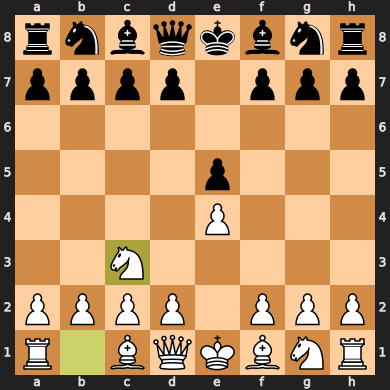

This position has been found 530 times
and it has a white advantage equal to
0.1169811320754717
Its results are
[248-96-186]
:


{Move.from_uci('f2f4'): 'r1bqkbnr/pppp1ppp/2n5/4p3/4PP2/2N5/PPPP2PP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('f1c4'): 'r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/2N5/PPPP1PPP/R1BQK1NR b KQkq - FEN_id ',
 Move.from_uci('f1e2'): 'r1bqkbnr/pppp1ppp/2n5/4p3/4P3/2N5/PPPPBPPP/R1BQK1NR b KQkq - FEN_id ',
 Move.from_uci('g2g3'): 'r1bqkbnr/pppp1ppp/2n5/4p3/4P3/2N3P1/PPPP1P1P/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('d2d3'): 'r1bqkbnr/pppp1ppp/2n5/4p3/4P3/2NP4/PPP2PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('a2a3'): 'r1bqkbnr/pppp1ppp/2n5/4p3/4P3/P1N5/1PPP1PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('g1e2'): 'r1bqkbnr/pppp1ppp/2n5/4p3/4P3/2N5/PPPPNPPP/R1BQKB1R b KQkq - FEN_id ',
 Move.from_uci('f1b5'): 'r1bqkbnr/pppp1ppp/2n5/1B2p3/4P3/2N5/PPPP1PPP/R1BQK1NR b KQkq - FEN_id ',
 Move.from_uci('b2b3'): 'r1bqkbnr/pppp1ppp/2n5/4p3/4P3/1PN5/P1PP1PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('f1d3'): 'r1bqkbnr/pppp1ppp/2n5/4p3/4P3/2NB4/PPPP1PPP/R1BQK1NR b KQkq - FEN_id '}

[Move.from_uci('f2f4'),
 Move.from_uci('f1c4'),
 Move.from_uci('f1e2'),
 Move.from_uci('g2g3'),
 Move.from_uci('d2d3'),
 Move.from_uci('a2a3'),
 Move.from_uci('g1e2'),
 Move.from_uci('f1b5'),
 Move.from_uci('b2b3'),
 Move.from_uci('f1d3')]

{}

Best move


None

with an advantage equal to 
-2
and a relative advantage equal to
-2.116981132075472
since  it has a white advantage equal to
0.1169811320754717
:


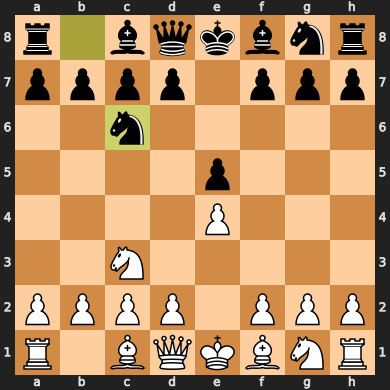

This position has been found 226 times
and it has a white advantage equal to
0.12831858407079647
Its results are
[98-59-69]
:


{Move.from_uci('c3a4'): 'rnbqk1nr/pppp1ppp/8/2b1p3/N3P3/8/PPPP1PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('g1f3'): 'rnbqk1nr/pppp1ppp/8/2b1p3/4P3/2N2N2/PPPP1PPP/R1BQKB1R b KQkq - FEN_id ',
 Move.from_uci('f2f4'): 'rnbqk1nr/pppp1ppp/8/2b1p3/4PP2/2N5/PPPP2PP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('g2g3'): 'rnbqk1nr/pppp1ppp/8/2b1p3/4P3/2N3P1/PPPP1P1P/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('f1c4'): 'rnbqk1nr/pppp1ppp/8/2b1p3/2B1P3/2N5/PPPP1PPP/R1BQK1NR b KQkq - FEN_id ',
 Move.from_uci('d1g4'): 'rnbqk1nr/pppp1ppp/8/2b1p3/4P1Q1/2N5/PPPP1PPP/R1B1KBNR b KQkq - FEN_id ',
 Move.from_uci('d2d3'): 'rnbqk1nr/pppp1ppp/8/2b1p3/4P3/2NP4/PPP2PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('d2d4'): 'rnbqk1nr/pppp1ppp/8/2b1p3/3PP3/2N5/PPP2PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('d1e2'): 'rnbqk1nr/pppp1ppp/8/2b1p3/4P3/2N5/PPPPQPPP/R1B1KBNR b KQkq - FEN_id ',
 Move.from_uci('f1b5'): 'rnbqk1nr/pppp1ppp/8/1Bb1p3/4P3/2N5/PPPP1PPP/R1BQK1NR b KQkq - FEN_id ',
 Move.from_uci('g1h3'): 'rnbqk1n

[Move.from_uci('c3a4'),
 Move.from_uci('g1f3'),
 Move.from_uci('f2f4'),
 Move.from_uci('g2g3'),
 Move.from_uci('f1c4'),
 Move.from_uci('d1g4'),
 Move.from_uci('d2d3'),
 Move.from_uci('d2d4'),
 Move.from_uci('d1e2'),
 Move.from_uci('f1b5'),
 Move.from_uci('g1h3')]

{}

Best move


None

with an advantage equal to 
-2
and a relative advantage equal to
-2.1283185840707963
since  it has a white advantage equal to
0.12831858407079647
:


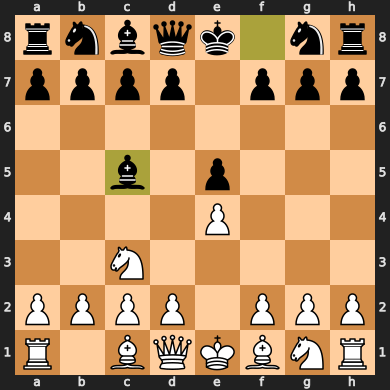

This position has been found 15 times
and it has a white advantage equal to
0.5333333333333333
Its results are
[11-1-3]
:


{Move.from_uci('f2f4'): 'rnbqkbnr/pp1p1ppp/2p5/4p3/4PP2/2N5/PPPP2PP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('f1c4'): 'rnbqkbnr/pp1p1ppp/2p5/4p3/2B1P3/2N5/PPPP1PPP/R1BQK1NR b KQkq - FEN_id ',
 Move.from_uci('d2d4'): 'rnbqkbnr/pp1p1ppp/2p5/4p3/3PP3/2N5/PPP2PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('g1f3'): 'rnbqkbnr/pp1p1ppp/2p5/4p3/4P3/2N2N2/PPPP1PPP/R1BQKB1R b KQkq - FEN_id '}

[Move.from_uci('f2f4'),
 Move.from_uci('f1c4'),
 Move.from_uci('d2d4'),
 Move.from_uci('g1f3')]

{}

Best move


None

with an advantage equal to 
-2
and a relative advantage equal to
-2.533333333333333
since  it has a white advantage equal to
0.5333333333333333
:


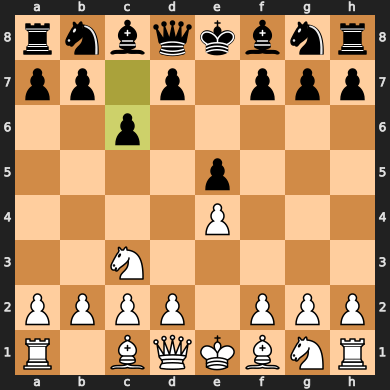

This position has been found 31 times
and it has a white advantage equal to
0.3548387096774194
Its results are
[19-4-8]
:


{Move.from_uci('f1c4'): 'rnbqk1nr/pppp1ppp/8/4p3/1bB1P3/2N5/PPPP1PPP/R1BQK1NR b KQkq - FEN_id ',
 Move.from_uci('d1g4'): 'rnbqk1nr/pppp1ppp/8/4p3/1b2P1Q1/2N5/PPPP1PPP/R1B1KBNR b KQkq - FEN_id ',
 Move.from_uci('g1e2'): 'rnbqk1nr/pppp1ppp/8/4p3/1b2P3/2N5/PPPPNPPP/R1BQKB1R b KQkq - FEN_id ',
 Move.from_uci('g2g3'): 'rnbqk1nr/pppp1ppp/8/4p3/1b2P3/2N3P1/PPPP1P1P/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('c3d5'): 'rnbqk1nr/pppp1ppp/8/3Np3/1b2P3/8/PPPP1PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('d2d4'): 'rnbqk1nr/pppp1ppp/8/4p3/1b1PP3/2N5/PPP2PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('g1f3'): 'rnbqk1nr/pppp1ppp/8/4p3/1b2P3/2N2N2/PPPP1PPP/R1BQKB1R b KQkq - FEN_id ',
 Move.from_uci('d2d3'): 'rnbqk1nr/pppp1ppp/8/4p3/1b2P3/2NP4/PPP2PPP/R1BQKBNR b KQkq - FEN_id ',
 Move.from_uci('a2a3'): 'rnbqk1nr/pppp1ppp/8/4p3/1b2P3/P1N5/1PPP1PPP/R1BQKBNR b KQkq - FEN_id '}

[Move.from_uci('f1c4'),
 Move.from_uci('d1g4'),
 Move.from_uci('g1e2'),
 Move.from_uci('g2g3'),
 Move.from_uci('c3d5'),
 Move.from_uci('d2d4'),
 Move.from_uci('g1f3'),
 Move.from_uci('d2d3'),
 Move.from_uci('a2a3')]

{}

Best move


None

with an advantage equal to 
-2
and a relative advantage equal to
-2.3548387096774195
since  it has a white advantage equal to
0.3548387096774194
:


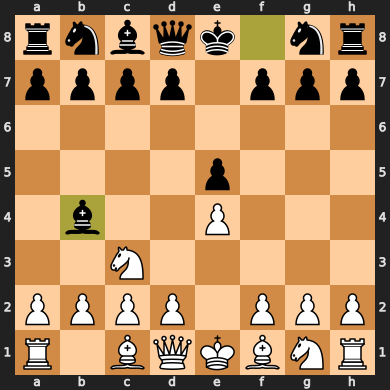

In [89]:
j = 0
for fen, pos in dizionario.items():     
    print("This position has been found %d times"%pos.multiplicity)
    print("and it has a white advantage equal to")
    print(pos.white_advantage)
    print("Its results are")
    print("[%d-%d-%d]"%(pos.white_wins,pos.draws,pos.black_wins))
    print(":")
    display(pos.variations_available)
    display(pos.moves_available)
    one_move_advantages = calculate_advantages(pos,dizionario)
    display(one_move_advantages)
    print ("Best move")
    best = find_best_move(one_move_advantages)
    display(best["move"])
    print("with an advantage equal to ")
    print(best["advantage"])
    print("and a relative advantage equal to")
    print(best["advantage"]- pos.white_advantage)
    print("since  it has a white advantage equal to")
    print(pos.white_advantage)
    
    print(":")
    display(pos.board)
    
    j+=1
    if j==7:
        break

## Game results debug



1-0


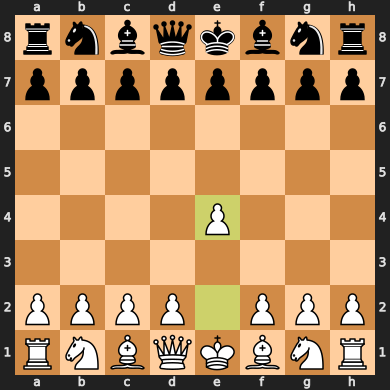

1-0


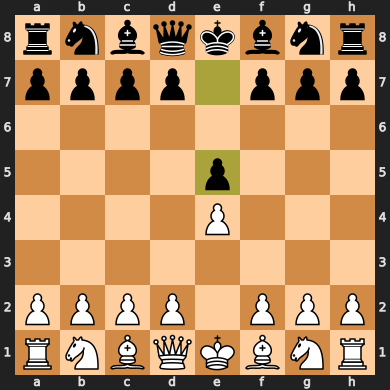

1-0


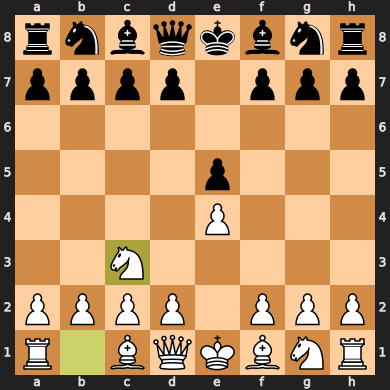

1-0


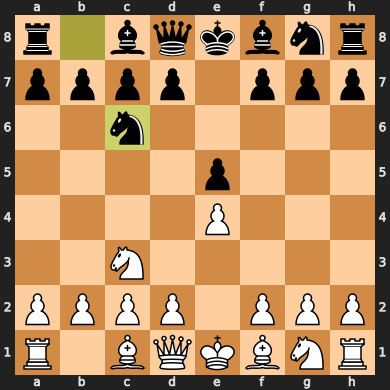

In [24]:
pgn = open_test_pgn()

def results_game(depth):
    new_game = chess.pgn.read_game(pgn)
    
    if new_game == None:
        return

    new_position = new_game

    for move in new_game.mainline_moves():  
        
        new_position = new_position.variation(move)
        
        print(new_position.game().headers['Result'])
        display(new_position.board())

        if new_position.ply() == depth:
            break

results_game(4)

0-1


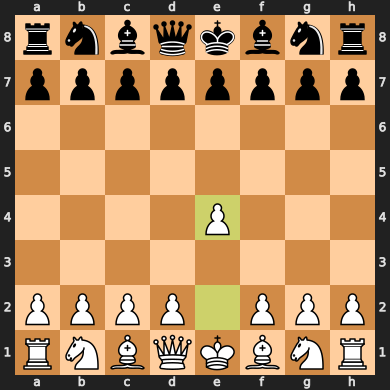

1-0


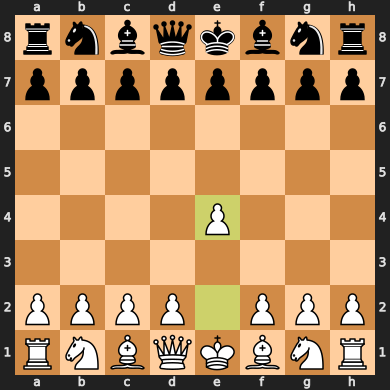

1-0


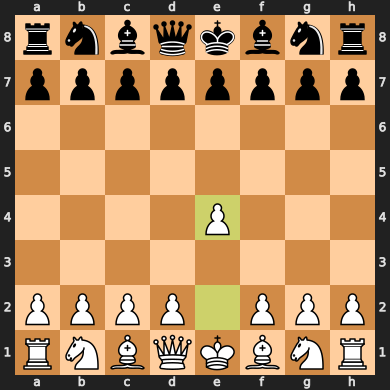

1/2-1/2


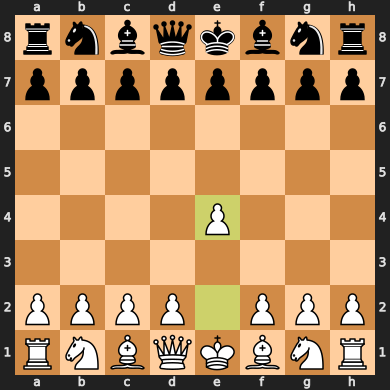

1-0


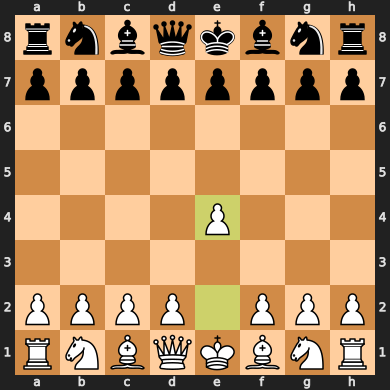

0-1


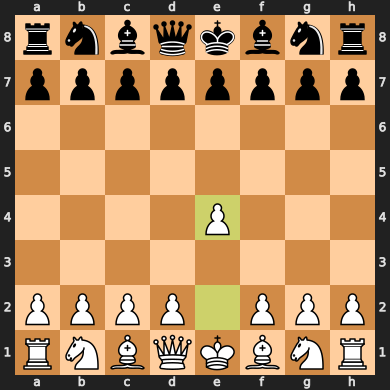

1/2-1/2


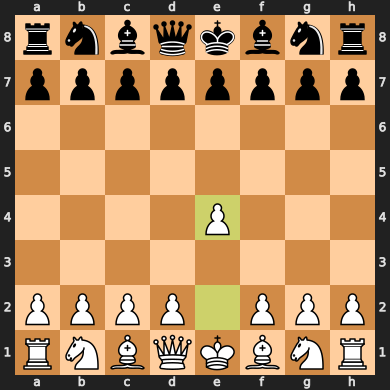

1-0


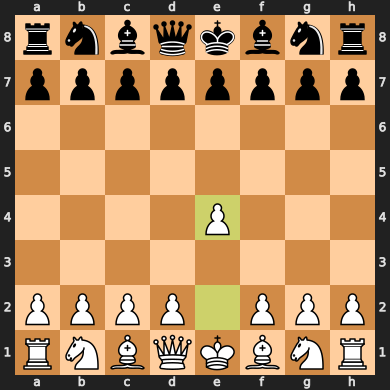

1-0


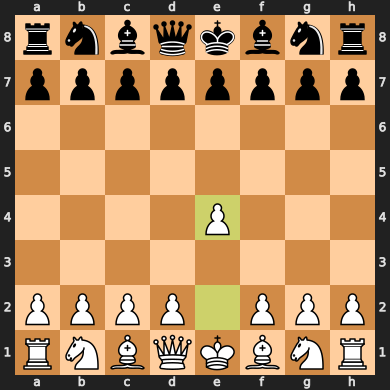

1-0


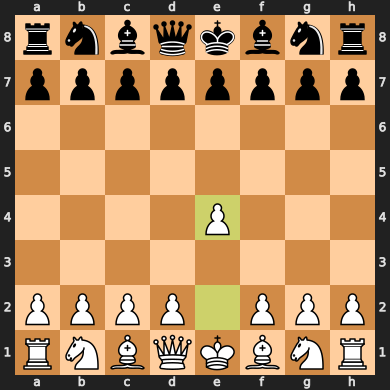

0-1


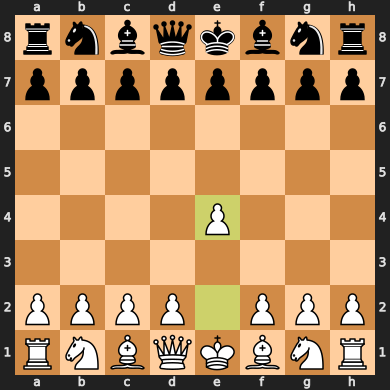

1-0


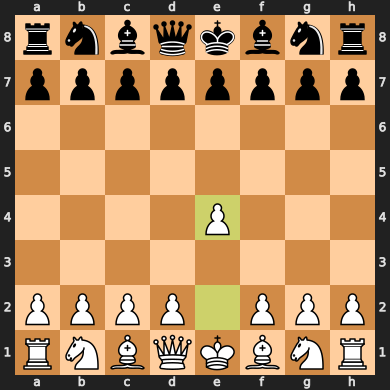

0-1


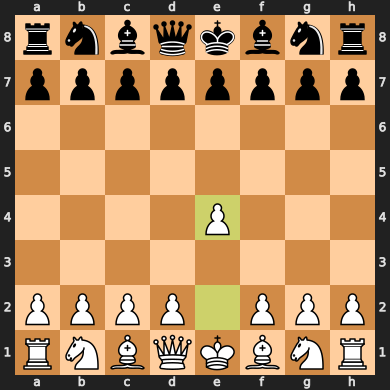

0-1


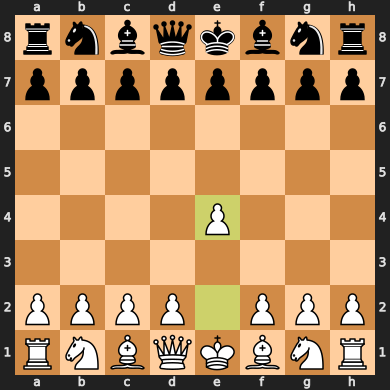

1-0


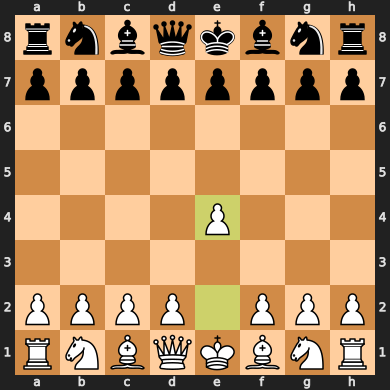

0-1


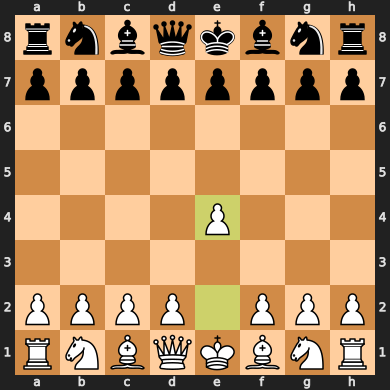

1/2-1/2


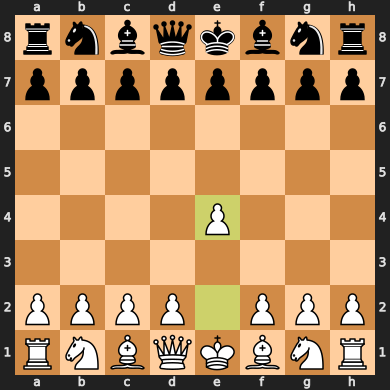

1-0


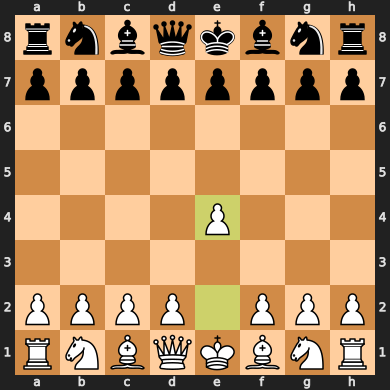

1-0


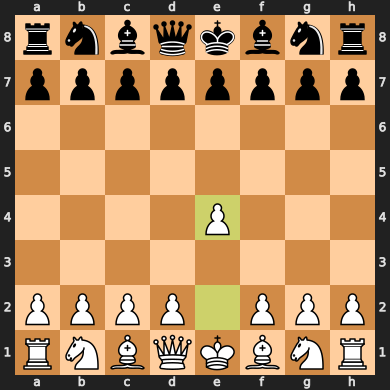

1-0


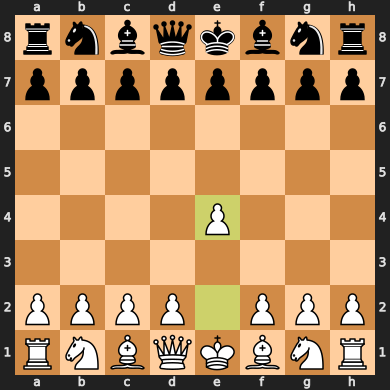

1-0


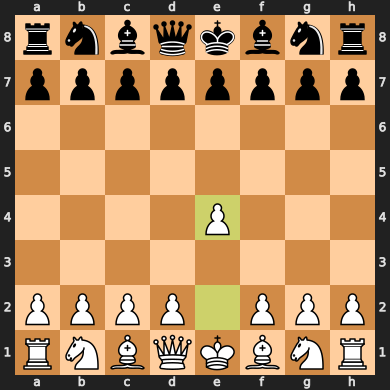

1-0


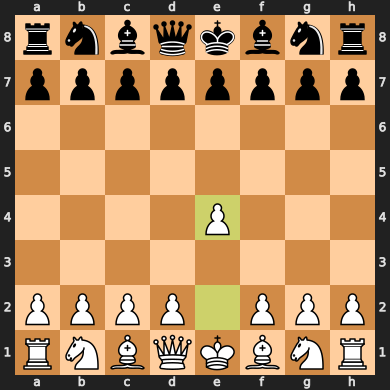

1-0


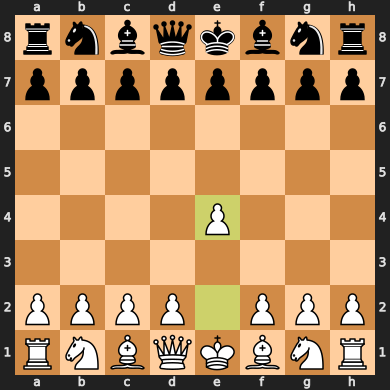

1-0


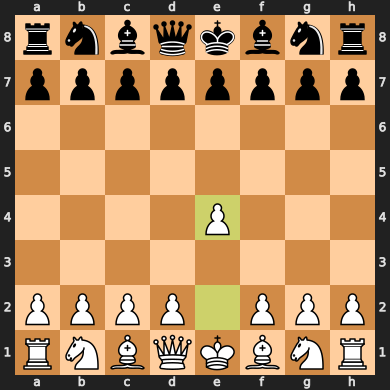

0-1


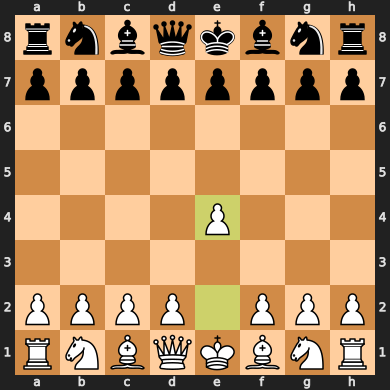

1-0


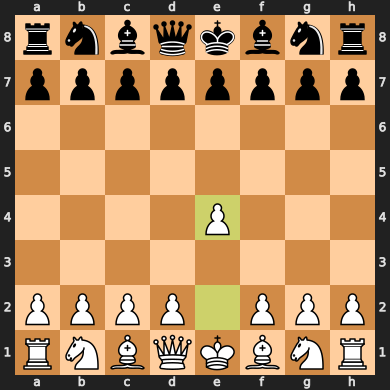

1-0


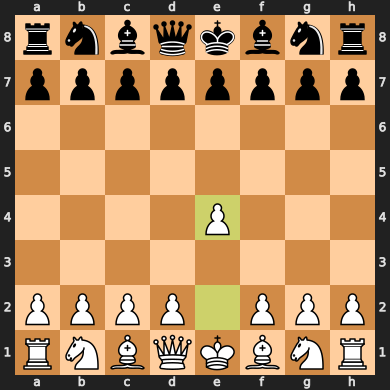

1-0


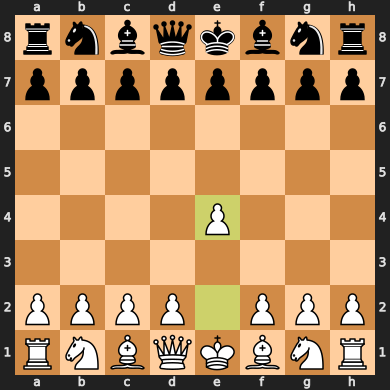

1-0


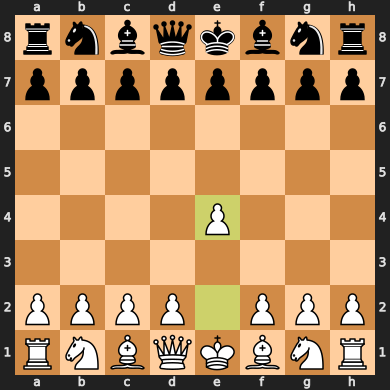

0-1


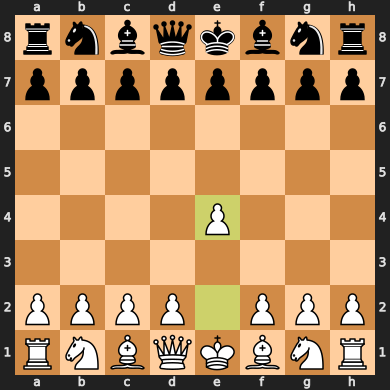

0-1


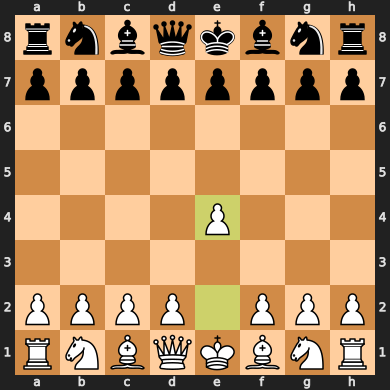

1-0


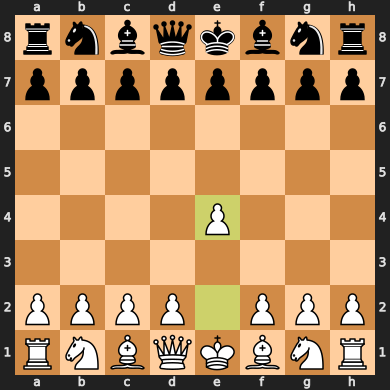

1-0


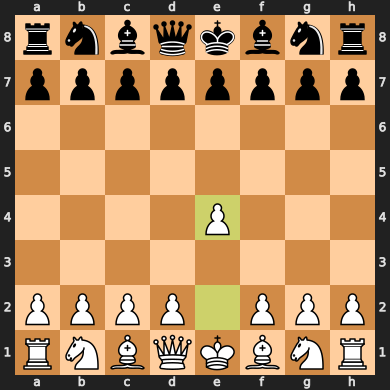

1-0


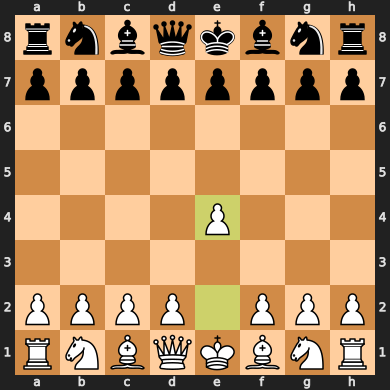

1-0


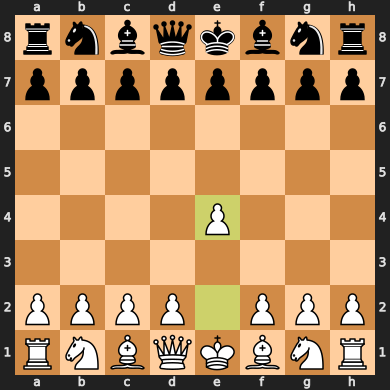

1-0


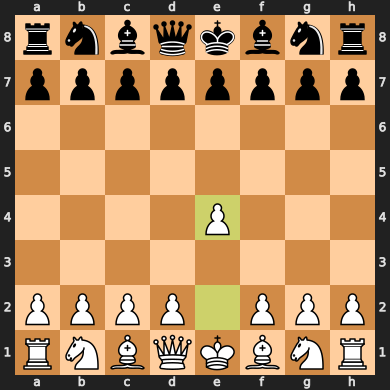

0-1


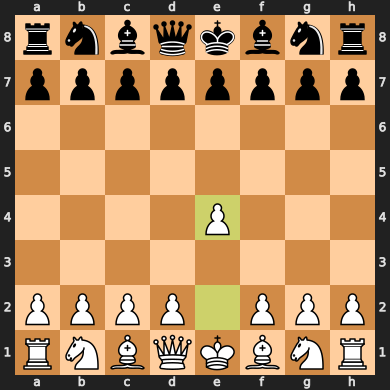

1-0


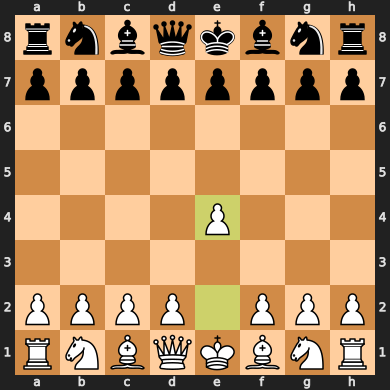

0-1


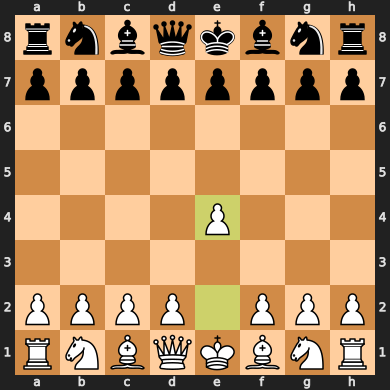

0-1


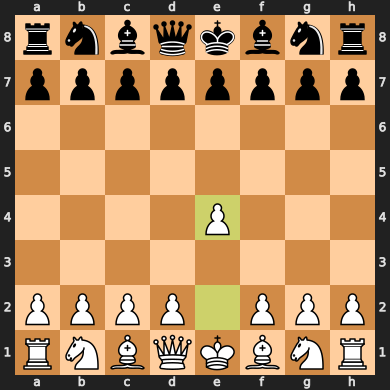

1-0


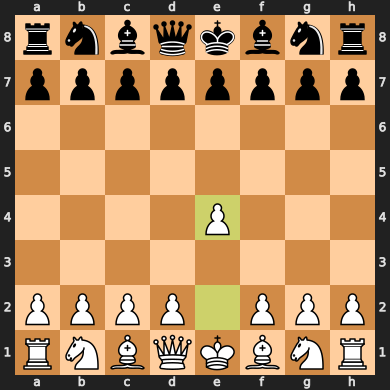

1-0


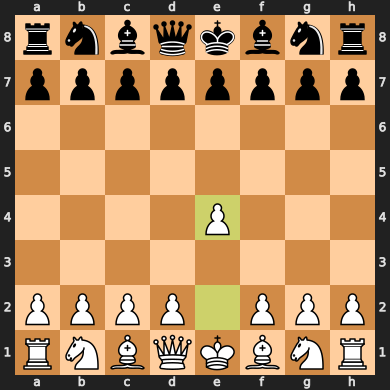

0-1


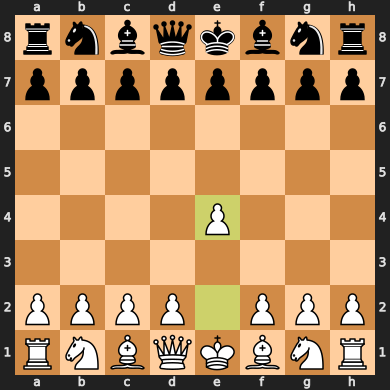

1/2-1/2


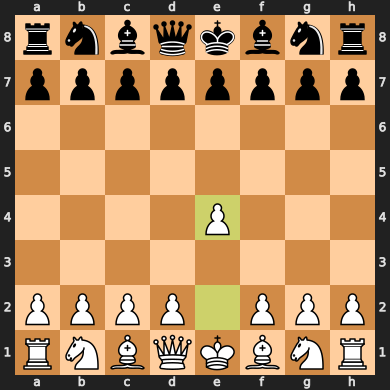

1/2-1/2


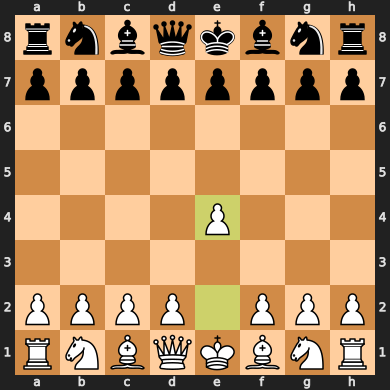

1-0


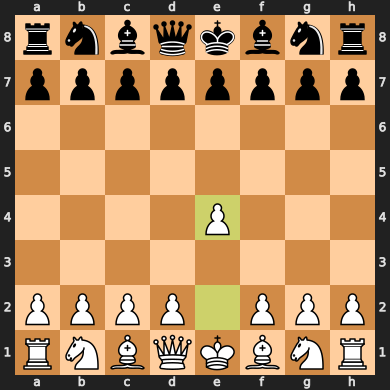

1-0


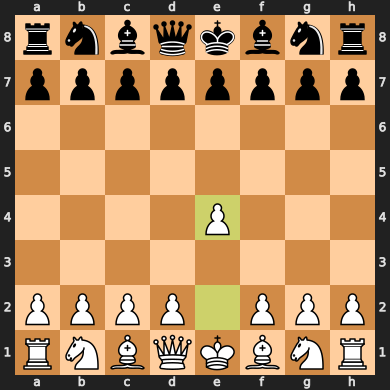

1-0


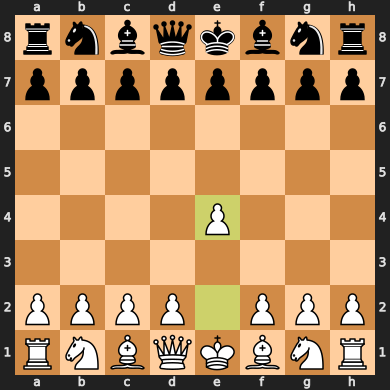

1-0


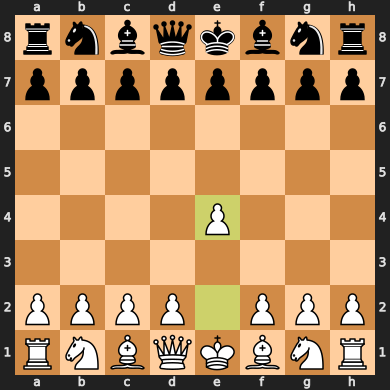

0-1


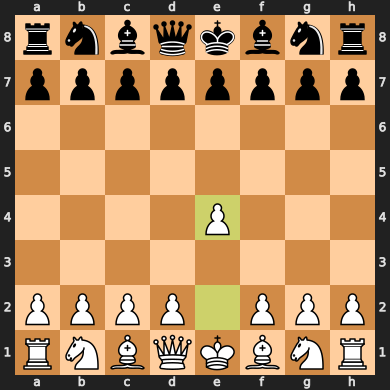

0-1


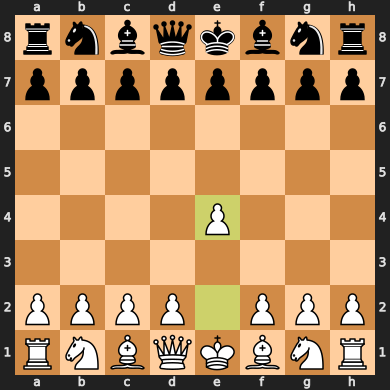

1-0


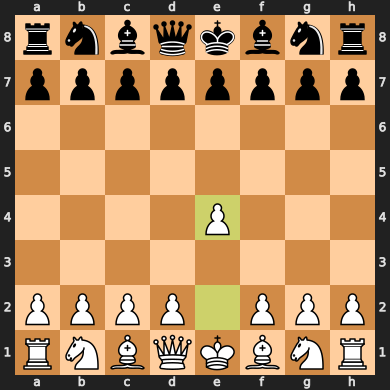

1-0


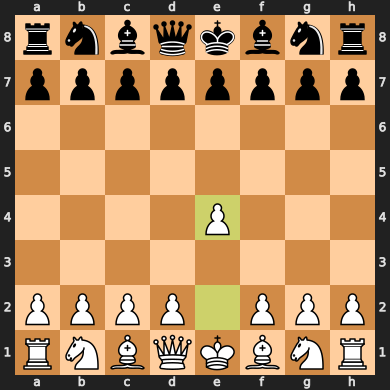

0-1


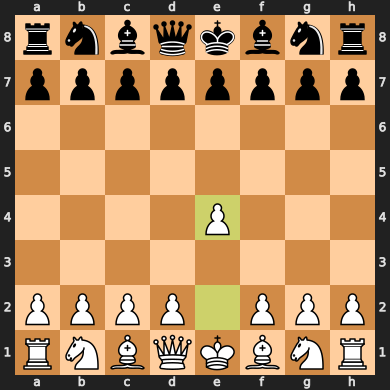

1-0


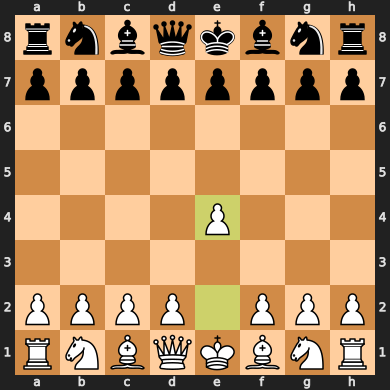

0-1


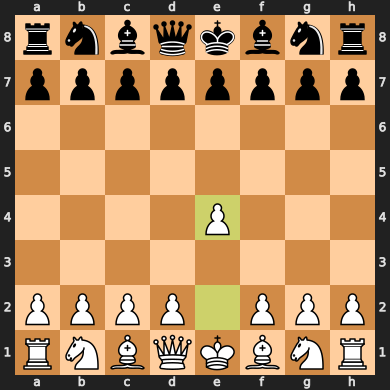

1/2-1/2


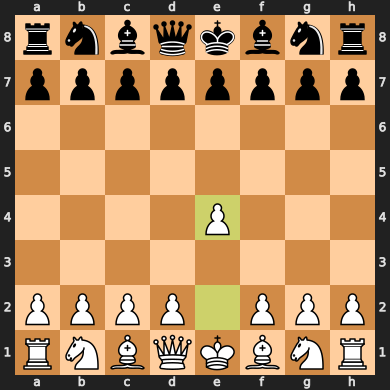

1-0


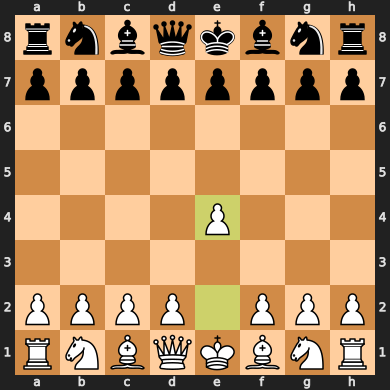

0-1


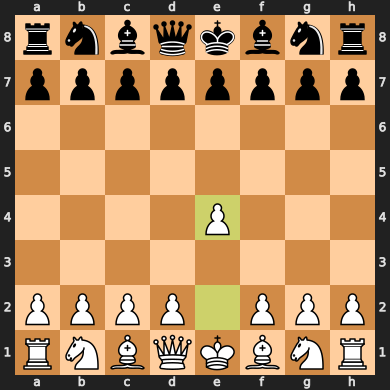

1-0


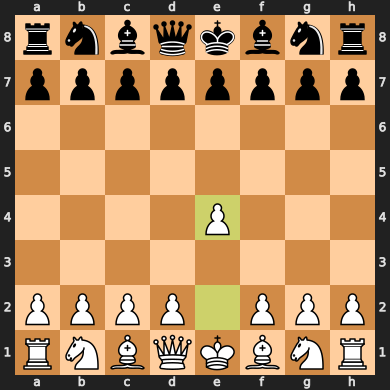

1/2-1/2


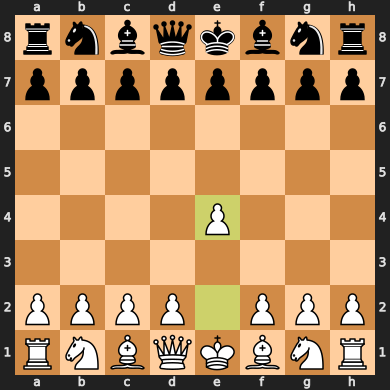

1-0


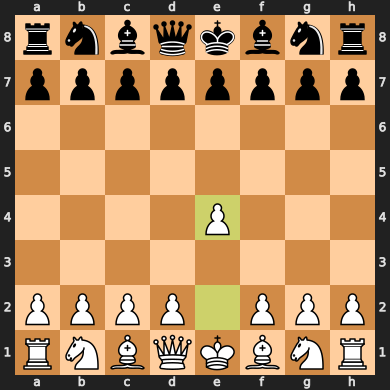

1-0


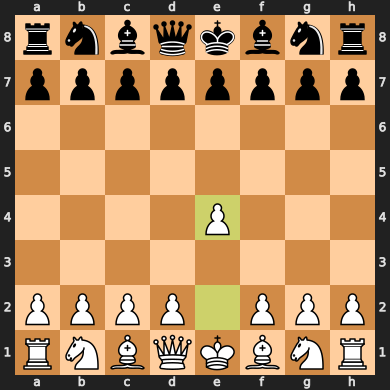

1-0


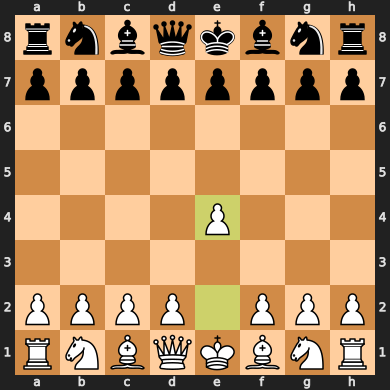

0-1


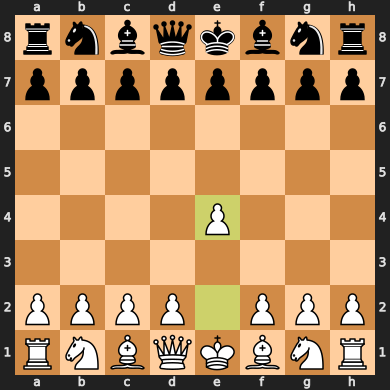

0-1


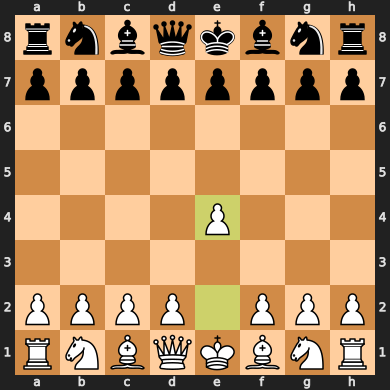

0-1


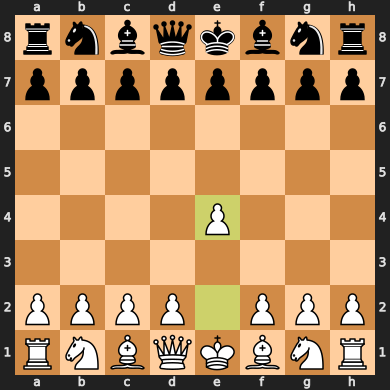

1/2-1/2


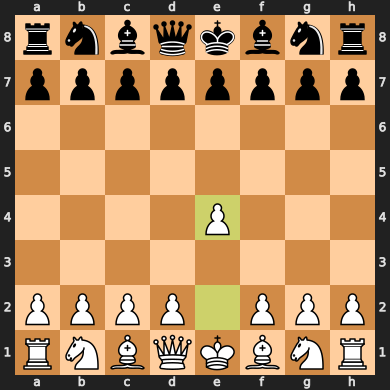

1-0


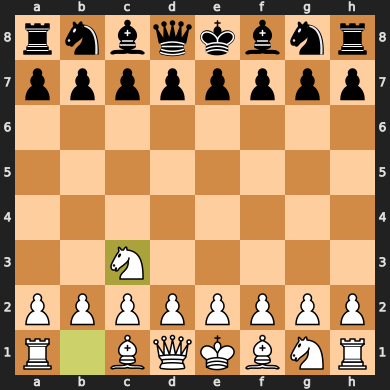

1/2-1/2


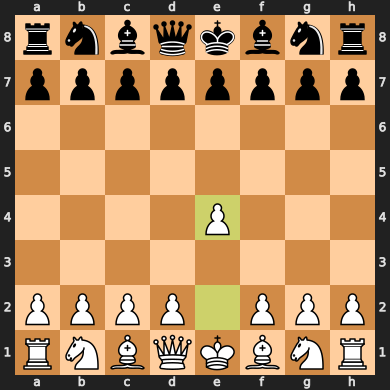

1-0


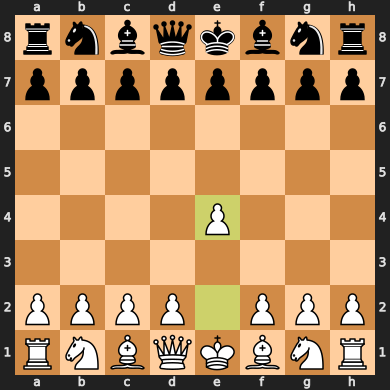

1-0


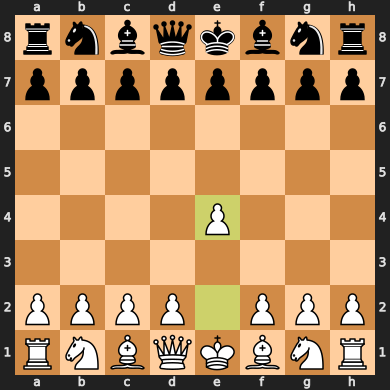

1-0


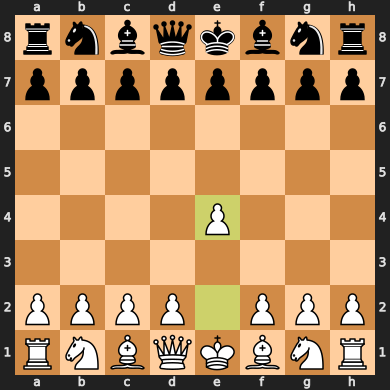

1/2-1/2


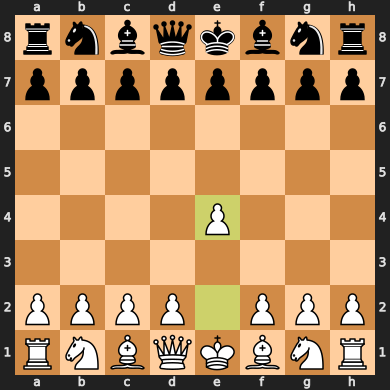

1/2-1/2


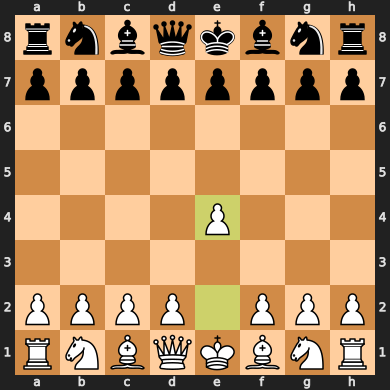

1/2-1/2


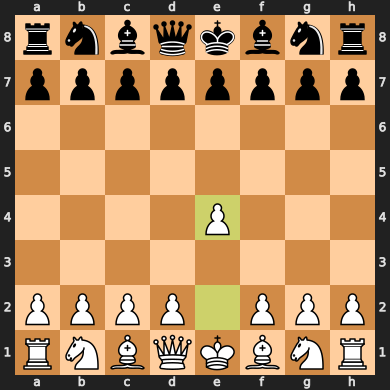

1/2-1/2


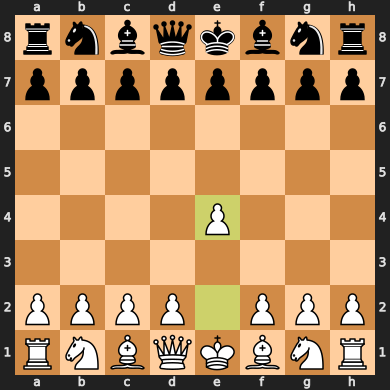

1/2-1/2


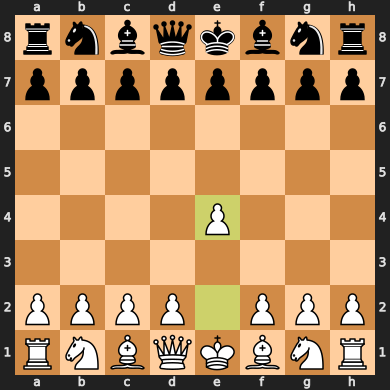

1-0


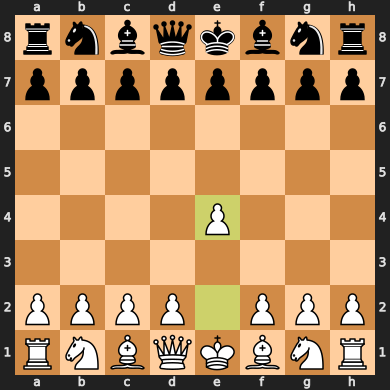

1/2-1/2


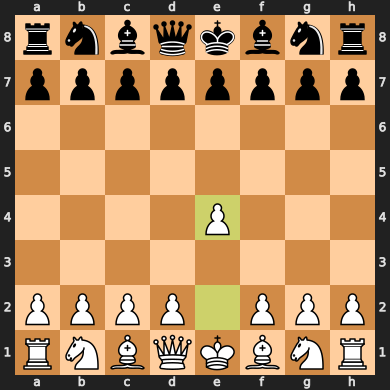

1-0


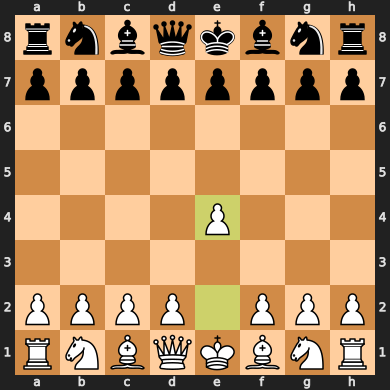

1/2-1/2


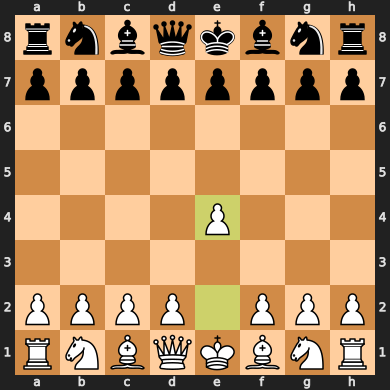

1/2-1/2


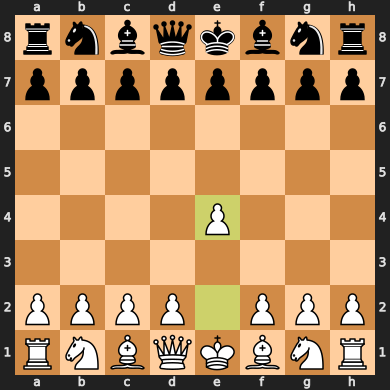

1-0


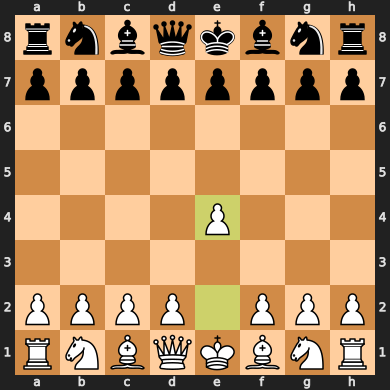

1-0


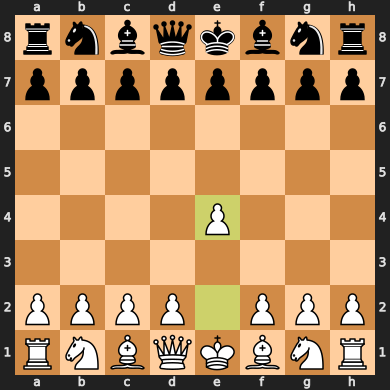

1/2-1/2


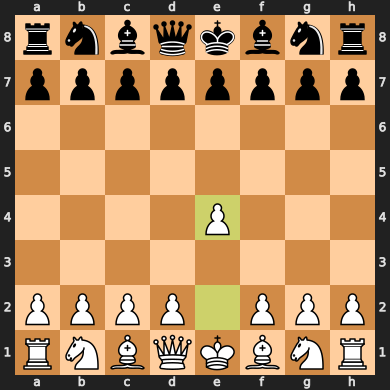

0-1


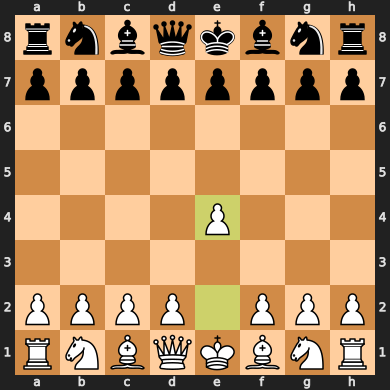

1-0


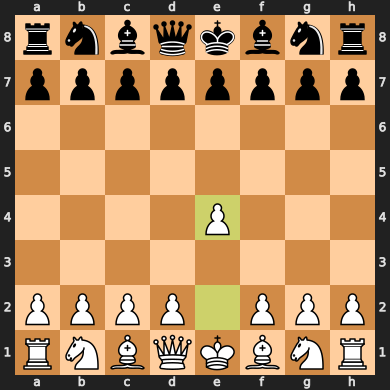

1-0


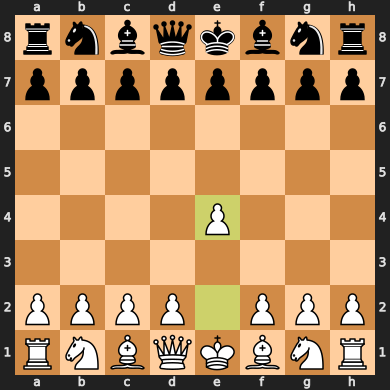

1/2-1/2


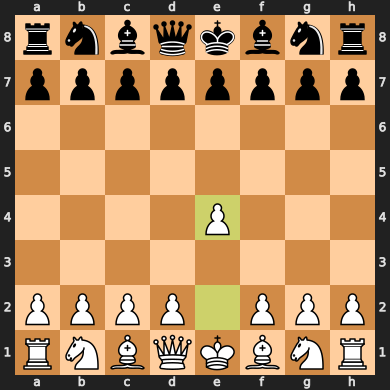

1/2-1/2


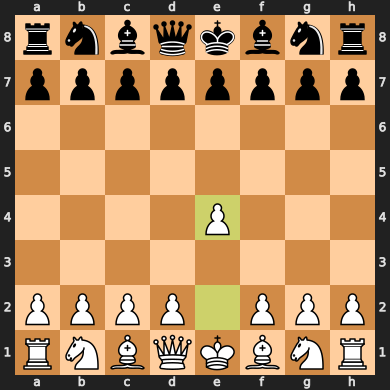

1-0


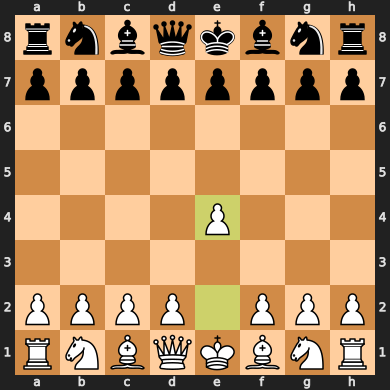

1-0


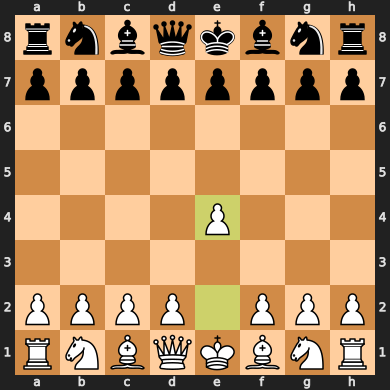

1-0


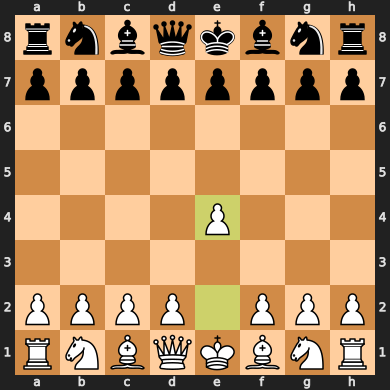

1/2-1/2


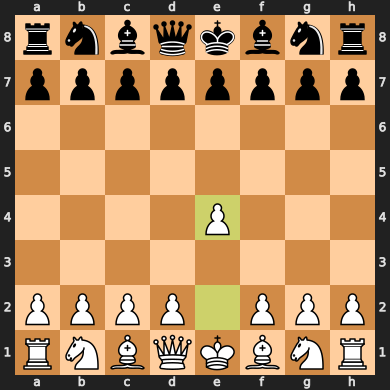

1-0


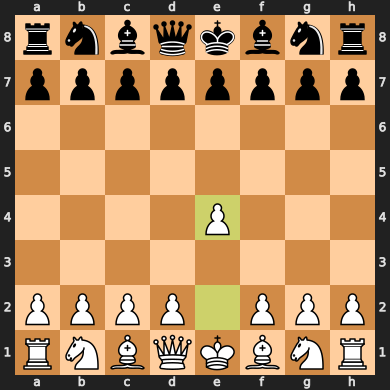

1-0


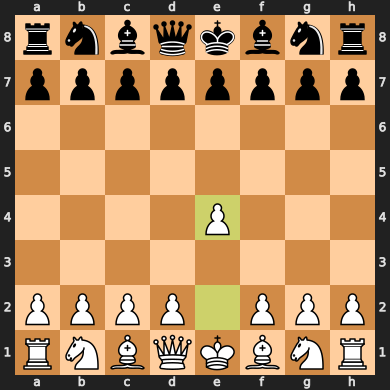

1-0


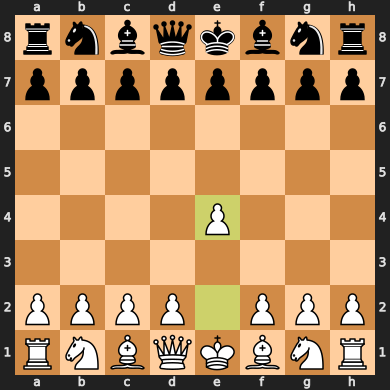

1-0


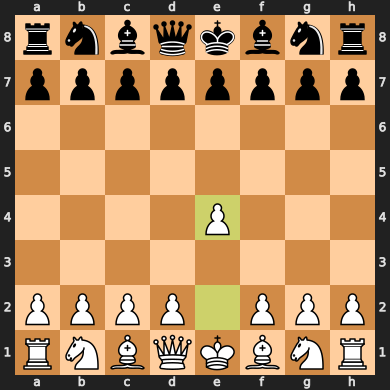

1-0


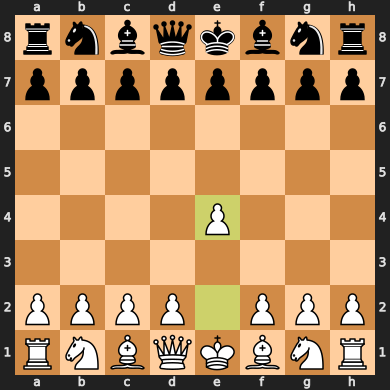

In [25]:
for i in range(100):
    results_game(1)

In [26]:
#searching winnning game

pgn = open_test_pgn()



def parse_one_game(diz,depth):
    new_game = chess.pgn.read_game(pgn)
    
    if new_game == None:
        return

    new_position = new_game

    for move in new_game.mainline_moves():  
        print("-------")
        print("New position")
        new_position = new_position.variation(move)
        
        print(new_position.game().headers['Result'])
        print(new_position.game().headers['Result'])
        
        print(new_position.board().fen())
        
        
        new_id = gamenode_to_id(new_position)

        if new_id in diz.keys():
            diz[new_id].update(new_position)
        else:
            diz[new_id] = MyGame(new_position)

        pos = diz[new_id]
        print("Multiplicity")
        print(pos.multiplicity)
        print("White wins")
        print(pos.white_wins)
        #print("Position result")
        #print(pos.result)
        
        if new_position.ply() == depth:
            break
            
def parse_few_games(depth,how_many):
    dizio = {}
    for i in range(how_many):
        parse_one_game(dizio,depth)
    

In [27]:
parse_few_games(3,10)

-------
New position
1-0
1-0
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1
Multiplicity
1
White wins
1
-------
New position
1-0
1-0
rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2
Multiplicity
1
White wins
1
-------
New position
1-0
1-0
rnbqkbnr/pppp1ppp/8/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR b KQkq - 1 2
Multiplicity
1
White wins
1
-------
New position
0-1
0-1
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1
Multiplicity
2
White wins
1
-------
New position
0-1
0-1
rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2
Multiplicity
2
White wins
1
-------
New position
0-1
0-1
rnbqkbnr/pppp1ppp/8/4p3/4P3/2N5/PPPP1PPP/R1BQKBNR b KQkq - 1 2
Multiplicity
2
White wins
1
-------
New position
1-0
1-0
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1
Multiplicity
3
White wins
2
-------
New position
1-0
1-0
rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2
Multiplicity
3
White wins
2
-------
New position
1-0
1-0
rnbqkbnr/pppp1ppp/8/4p3/4P3/2